In [1]:
# loading necessary libraries, couldnot import tensorflow and keras on web jupyter notebook but could do it in normall jupyter lab 
# so i am writing the code in visual studio, i will upload to the web version after
%pip install numpy
%pip install pandas 
%pip install matplotlib
%pip install seaborn                                                                                     
%pip install tensorflow 
%pip install scikit-learn 
%pip install keras

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated pa

In [2]:
#importing necessary libraries to visualize etc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
 

/Users/mervebilgi/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
#loading the dataset and the given link suggests ( MNIST dataset ) 
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()
#The MNIST dataset contains 28× 28 grayscale images of handwritten digits (0-9), where each pixel value ranges from 0 to 255.


#Split the data as follows:
#• Training Set: Use 80% of the provided training data.
#• Validation Set: Use the remaining 20% of the training data.
#• Test Set: Use the given test set without modification
 
# Normalize pixel values to [0,1]  2.3
x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

# Split training data: 80% Train, 20% Validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
#idk why used 42 but as i understand its arbitrary and 42 is common used randoming because MNIST may be  ordered??

# Print dataset shapes
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Validation set: {x_val.shape}, Labels: {y_val.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")


Training set: (48000, 28, 28), Labels: (48000,)
Validation set: (12000, 28, 28), Labels: (12000,)
Test set: (10000, 28, 28), Labels: (10000,)


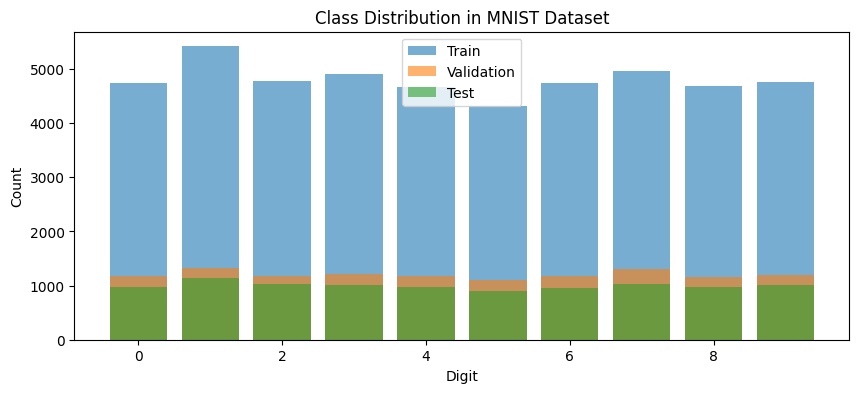

In [4]:
import pandas as pd
#2.2 Data Analysis 
#Before preprocessing, perform the following analysis:
#1. Class Distribution: Compute and display the number of samples per digit to check for imbalances.
#2. Basic Statistics: Calculate the mean and standard deviation of the pixel values.
#3. Visualization: Create subplots showing at least one sample image for each digi
# Counting samples per class
train_counts = pd.Series(y_train).value_counts().sort_index()
val_counts = pd.Series(y_val).value_counts().sort_index()
test_counts = pd.Series(y_test).value_counts().sort_index()
                     
# Ploting class distribution
plt.figure(figsize=(10, 4))
plt.bar(train_counts.index, train_counts.values, label="Train", alpha=0.6)
plt.bar(val_counts.index, val_counts.values, label="Validation", alpha=0.6)
plt.bar(test_counts.index, test_counts.values, label="Test", alpha=0.6)
plt.xlabel("Digit")
plt.ylabel("Count")   
plt.legend()
plt.title("Class Distribution in MNIST Dataset")
plt.show()


In [5]:
# Compute mean and standard deviation of pixel values 2.2 BASIC STATISTICS calculations
mean_pixel_value = x_train.mean()
std_pixel_value = x_train.std()

print(f"Mean Pixel Value: {mean_pixel_value:.4f}")
print(f"Standard Deviation: {std_pixel_value:.4f}")


Mean Pixel Value: 0.1307
Standard Deviation: 0.3082


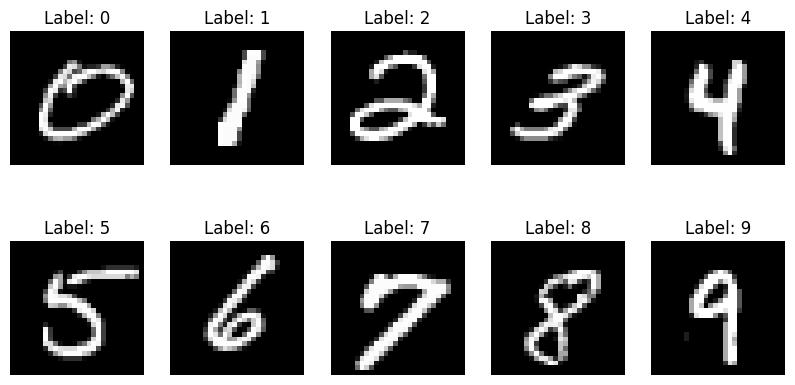

In [6]:
# Display one sample image per digit 2.2 visualisaiton                         
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    img_index = np.where(y_train == i)[0][0]  # Get first index of digit i
    ax.imshow(x_train[img_index], cmap='gray')
    ax.set_title(f"Label: {i}")
    ax.axis('off')
plt.show()


k=1: Validation Accuracy = 0.9741
k=3: Validation Accuracy = 0.9727
k=5: Validation Accuracy = 0.9715
k=7: Validation Accuracy = 0.9696
k=9: Validation Accuracy = 0.9673


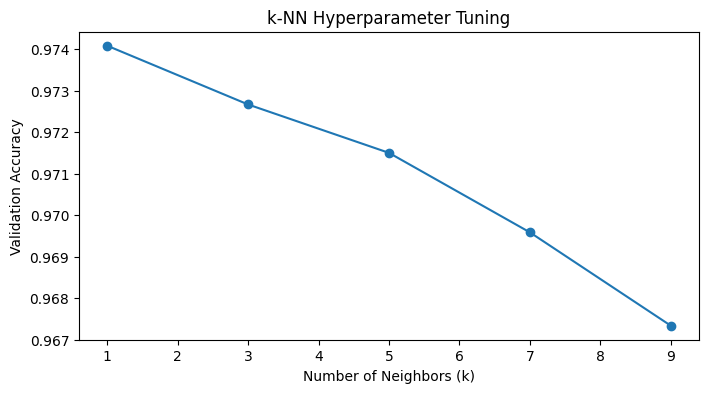

In [7]:
# Reshape images into vectors (28x28 → 784)
x_train_flat = x_train.reshape(len(x_train), -1)
x_val_flat = x_val.reshape(len(x_val), -1)
# Some classifiers in scikit-learn (like k-NN & Decision Trees) require 1D feature vectors. ( they say )

# Trying different k values 1-3-5-7-9
k_values = [1, 3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_flat, y_train)
    y_val_pred = knn.predict(x_val_flat)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"k={k}: Validation Accuracy = {acc:.4f}")

# Plot accuracy vs k
plt.figure(figsize=(8, 4))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Hyperparameter Tuning")
plt.show()


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



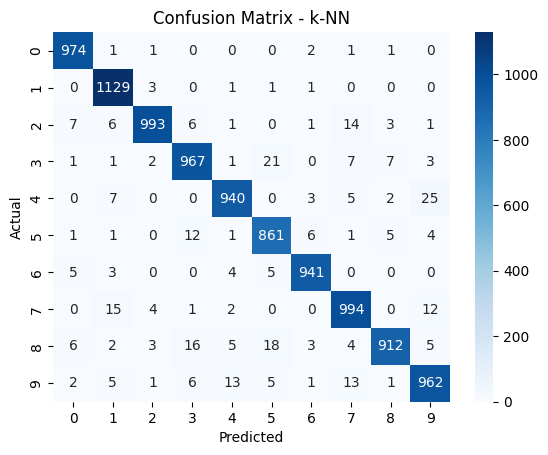

In [8]:
# Train final model using best k
best_k = k_values[np.argmax(val_accuracies)]
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train_flat, y_train)

# Evaluate on test set
x_test_flat = x_test.reshape(len(x_test), -1)
y_test_pred_knn = knn_final.predict(x_test_flat)

# Print evaluation metrics
print(classification_report(y_test, y_test_pred_knn))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - k-NN")
plt.show()


In [9]:
depth_values = [2, 5, 10]
split_values = [2, 5]
results = []

for depth in depth_values:
    for min_split in split_values:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_split, random_state=42)
        dt.fit(x_train_flat, y_train)
        y_val_pred = dt.predict(x_val_flat)
        acc = accuracy_score(y_val, y_val_pred)
        results.append((depth, min_split, acc))
        print(f"Depth={depth}, Min Split={min_split}: Validation Accuracy = {acc:.4f}")


Depth=2, Min Split=2: Validation Accuracy = 0.3377
Depth=2, Min Split=5: Validation Accuracy = 0.3377
Depth=5, Min Split=2: Validation Accuracy = 0.6579
Depth=5, Min Split=5: Validation Accuracy = 0.6579
Depth=10, Min Split=2: Validation Accuracy = 0.8577
Depth=10, Min Split=5: Validation Accuracy = 0.8568


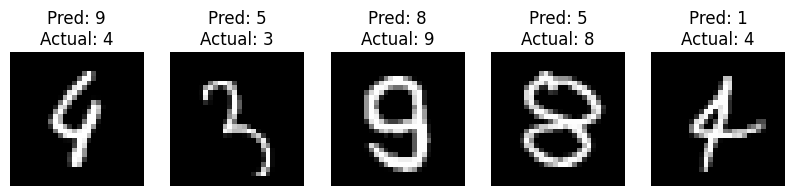

In [10]:
misclassified = np.where(y_test != y_test_pred_knn)[0]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_test_pred_knn[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.94      0.97      0.95      1135
           2       0.85      0.85      0.85      1032
           3       0.84      0.85      0.84      1010
           4       0.85      0.83      0.84       982
           5       0.84      0.81      0.82       892
           6       0.89      0.88      0.89       958
           7       0.90      0.89      0.89      1028
           8       0.83      0.78      0.81       974
           9       0.80      0.84      0.82      1009

    accuracy                           0.87     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



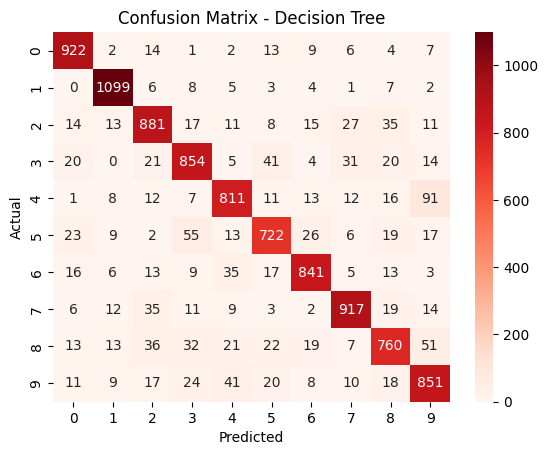

In [11]:
# Select best hyperparameters
best_depth, best_min_split, _ = max(results, key=lambda x: x[2])
dt_final = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_split, random_state=42)
dt_final.fit(x_train_flat, y_train)

# Evaluate on test set
y_test_pred_dt = dt_final.predict(x_test_flat)

# Print evaluation metrics
print(classification_report(y_test, y_test_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


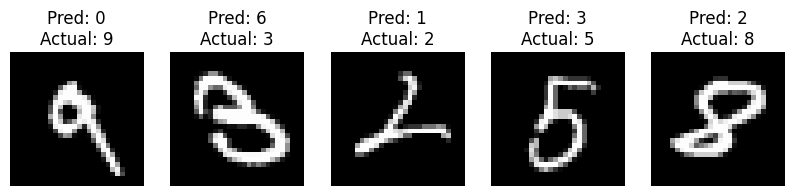

In [12]:
misclassified = np.where(y_test != y_test_pred_dt)[0]

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    idx = misclassified[i]
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_test_pred_dt[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')
plt.show()

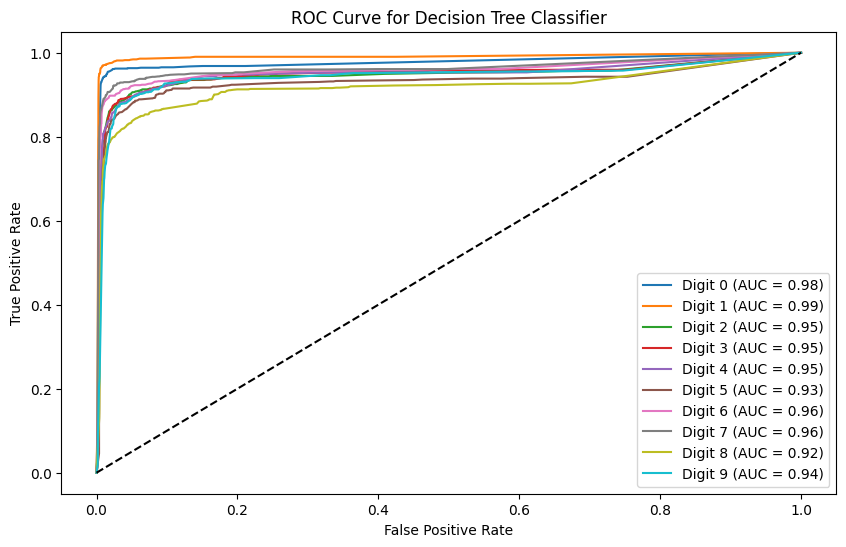

In [13]:
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=np.arange(10))
y_score = dt_final.predict_proba(x_test_flat)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.show()
